In [1]:
import csv
import random
from shutil import copyfile
from pycocotools.coco import COCO
from tqdm import tqdm

In [11]:
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test

mkdir: cannot create directory ‘data/images’: File exists
mkdir: cannot create directory ‘data/images/train’: File exists
mkdir: cannot create directory ‘data/images/val’: File exists
mkdir: cannot create directory ‘data/images/test’: File exists


In [4]:
coco = COCO('./data/annotations/captions_train2014.json')

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!


In [5]:
#get ids of training images
with open('train_ids.csv', 'r') as f:
    reader = csv.reader(f)
    trainIds = list(reader)
    
trainIds = [int(i) for i in trainIds[0]]

with open('val_ids.csv', 'r') as f:
    reader = csv.reader(f)
    valIds = list(reader)
    
valIds = [int(i) for i in valIds[0]]

In [6]:
for img_id in trainIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/train/'+path)
for img_id in valIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/val/'+path)

In [7]:
cocoTest = COCO('./data/annotations/captions_val2014.json')

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!


In [8]:
with open('test_ids.csv', 'r') as f:
    reader = csv.reader(f)
    testIds = list(reader)
    
testIds = [int(i) for i in testIds[0]]

In [9]:
for img_id in testIds:
    path = cocoTest.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/val2014/'+path, './data/images/test/'+path)

In [10]:
print("done")

done


In [15]:
import dataset_factory as f
from file_utils import *
import nltk
nltk.download('punkt')


name = 'default'
config_data = read_file_in_dir('./', name + '.json')

coco_test, vocab, train_dataloader, val_dataloader, test_dataloader = f.get_datasets(config_data)

[nltk_data] Downloading package punkt to /home/sramaswa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Toke

In [28]:
!python3 vocab.py

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torch.utils.data.dataloader.DataLoader'>
AxesImage(54,36;334.8x217.44)
tensor([  1.,   4., 334.,  14.,  53., 141.,  41., 260.,  14.,   4., 520., 261.,
        519., 709.,  19.,   2.])
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the cap

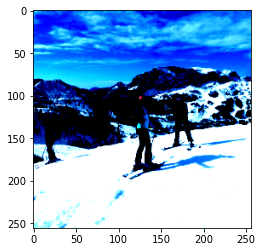

In [31]:
#print(type(train_dataloader))
import matplotlib.pyplot as plt

from vocab import *

print(plt.imshow(train_dataloader.dataset.__getitem__(0)[0].permute(1, 2, 0)))
#print(train_dataloader.dataset.__getitem__(0)[1])

captions = []
vocab = build_vocab("./data/annotations/captions_train2014.json", 2)
print(vocab.word2idx)
# for image, target, img_id in enumerate(train_dataloader):
#     captions.append(target)

In [42]:
words = vocab.word2idx
idx2w = vocab.idx2word

In [51]:
length = 0
for x in list(train_dataloader.dataset.__getitem__(0)[1].numpy()):
    length += 1
    print(idx2w[int(x)])
print(length)
length2 = 0
for x in list(train_dataloader.dataset.__getitem__(1)[1].numpy()):
    length2 += 1
    print(idx2w[int(x)])
print(length2)

<start>
a
couple
of
people
riding
on
top
of
a
snow
covered
ski
slope
.
<end>
16
<start>
a
couple
of
people
in
skis
are
standing
on
a
snowy
hill
<end>
14


In [44]:
print(len(vocab))

14462


In [57]:
max_length = -1
histo = set()
for itera, (image, captions, index) in enumerate(train_dataloader):
    print(index)
#     for caption in captions:
#         length = len(list(caption.numpy()))
#         histo.add(length)
#         max_length = max(length, max_length)
    
print(max_length)
print(histo)

[78003, 196804, 532253, 494837, 537878, 272588, 177238, 94118, 230046, 482195, 38933, 215577, 8794, 554542, 357929, 478692, 446956, 554453, 101485, 288739, 99636, 222262, 167574, 446898, 449510, 39598, 481802, 504159, 157368, 342130, 77155, 480883, 53514, 364835, 380742, 423606, 84902, 510718, 55942, 119822, 479620, 438314, 308170, 503502, 101738, 372303, 313873, 73941, 76308, 369966, 56650, 406250, 162491, 401266, 67046, 114629, 56677, 562100, 74390, 35446, 71476, 570785, 138100, 450136]
[377914, 452441, 344280, 69047, 436979, 249619, 446126, 393630, 316650, 162693, 214475, 575644, 296033, 539055, 516417, 184999, 41630, 481828, 258191, 312126, 306454, 549377, 237203, 406514, 437517, 285405, 181734, 612, 48181, 474720, 450551, 14036, 516777, 514806, 233970, 402396, 479539, 388872, 505898, 290856, 336697, 368564, 577275, 1864, 102315, 400405, 359789, 514025, 297844, 78451, 331594, 213963, 418506, 12057, 67446, 262901, 292030, 433063, 30583, 400558, 215315, 14985, 422061, 496342]
[308520

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/pin_memory.py", line 21, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/opt/conda/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 284, in rebuild_storage_fd
    fd = df.detach()
  File "/opt/conda/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/opt/conda/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_process().a

KeyboardInterrupt: 